## Importing all the necessary libraries

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.api import VARMAX
from sklearn.metrics import mean_squared_error


## Downloading Reliance Data from Yahoo finance

In [ ]:
import yfinance as yf
%%capture
data = yf.download('RELIANCE.NS',end = '2024-12-24')

## Data Inspection

In [ ]:
data.shape

(7276, 6)

In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data.head()

Price,Open,High,Low,Volume,Adj Close,Close
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
1996-01-01,7.319124,7.358397,7.270925,104121369,3.757304,7.345901
1996-01-02,7.328050,7.363753,7.235222,168743308,3.728085,7.288776
1996-01-03,7.408381,7.745775,7.328050,209323879,3.756391,7.344116
1996-01-04,7.274495,7.297702,7.178097,216900264,3.721694,7.276280
1996-01-05,7.247718,7.247718,7.163816,166708467,3.696128,7.226296


In [ ]:
data.tail()

Price,Open,High,Low,Volume,Adj Close,Close
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2024-12-17,1261.050049,1263.900024,1242.800049,17462791,1245.300049,1245.300049
2024-12-18,1240.650024,1259.949951,1240.650024,12670179,1253.250000,1253.250000
2024-12-19,1239.000000,1244.900024,1229.000000,14244653,1230.449951,1230.449951
2024-12-20,1224.000000,1239.500000,1201.500000,20312896,1205.300049,1205.300049
2024-12-23,1215.000000,1227.199951,1213.199951,10052824,1222.300049,1222.300049


In [ ]:
head.to_csv('head.csv')

In [ ]:
data.columns

MultiIndex([('Adj Close', 'RELIANCE.NS'),
            (    'Close', 'RELIANCE.NS'),
            (     'High', 'RELIANCE.NS'),
            (      'Low', 'RELIANCE.NS'),
            (     'Open', 'RELIANCE.NS'),
            (   'Volume', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7276 entries, 1996-01-01 to 2024-12-23
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Adj Close, RELIANCE.NS)  7276 non-null   float64
 1   (Close, RELIANCE.NS)      7276 non-null   float64
 2   (High, RELIANCE.NS)       7276 non-null   float64
 3   (Low, RELIANCE.NS)        7276 non-null   float64
 4   (Open, RELIANCE.NS)       7276 non-null   float64
 5   (Volume, RELIANCE.NS)     7276 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 397.9 KB


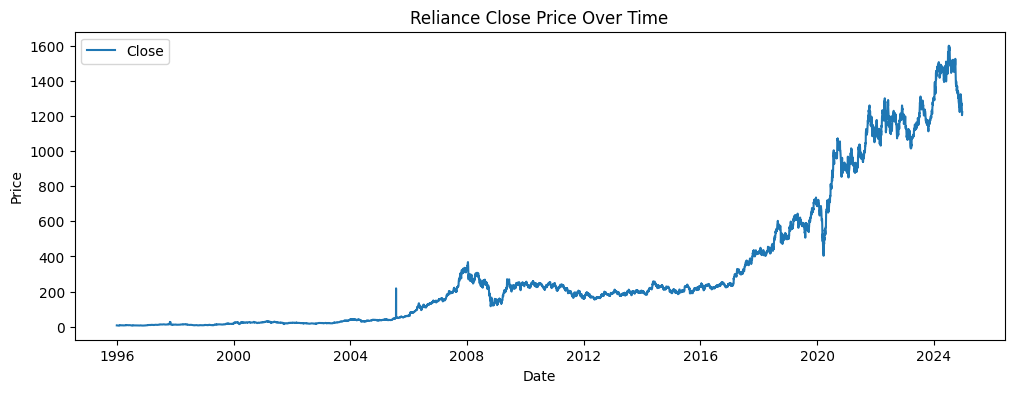

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( data['Close'], label = 'Close')
plt.title('Reliance Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
data = data[['Open','High','Low','Volume','Adj Close','Close']]

In [ ]:
data.head()

Price,Open,High,Low,Volume,Adj Close,Close
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
1996-01-01,7.319124,7.358397,7.270925,104121369,3.757304,7.345901
1996-01-02,7.328050,7.363753,7.235222,168743308,3.728085,7.288776
1996-01-03,7.408381,7.745775,7.328050,209323879,3.756391,7.344116
1996-01-04,7.274495,7.297702,7.178097,216900264,3.721694,7.276280
1996-01-05,7.247718,7.247718,7.163816,166708467,3.696128,7.226296


## Data is decomposed to identify trends and patterns

In [ ]:
decomposition = seasonal_decompose(data['Close'], model = 'additive', period = 365)


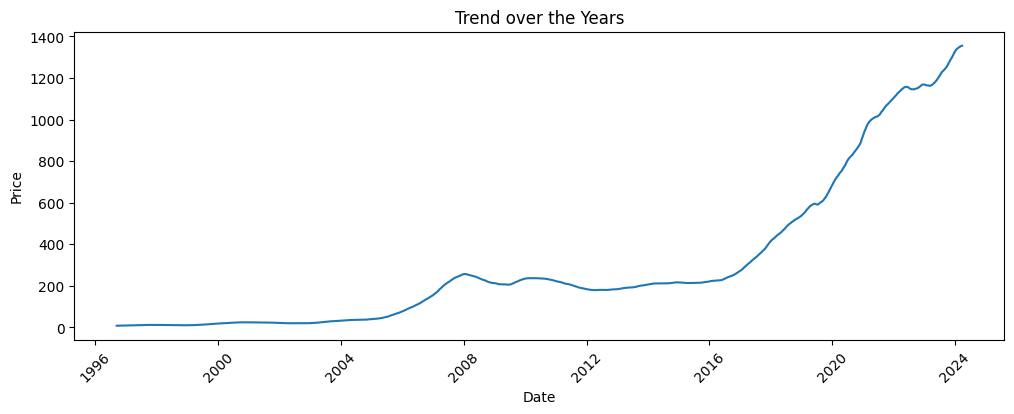

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( decomposition.trend)
plt.title('Trend over the Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation = 45)
plt.show()

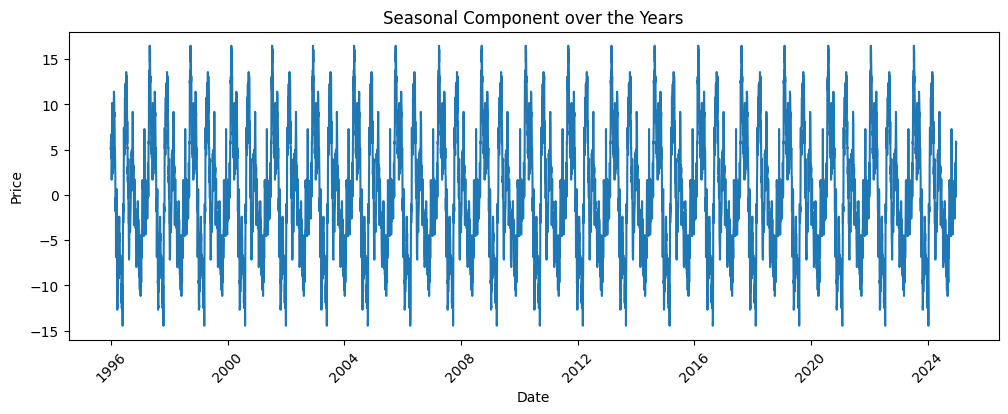

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component over the Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation = 45)
plt.show()

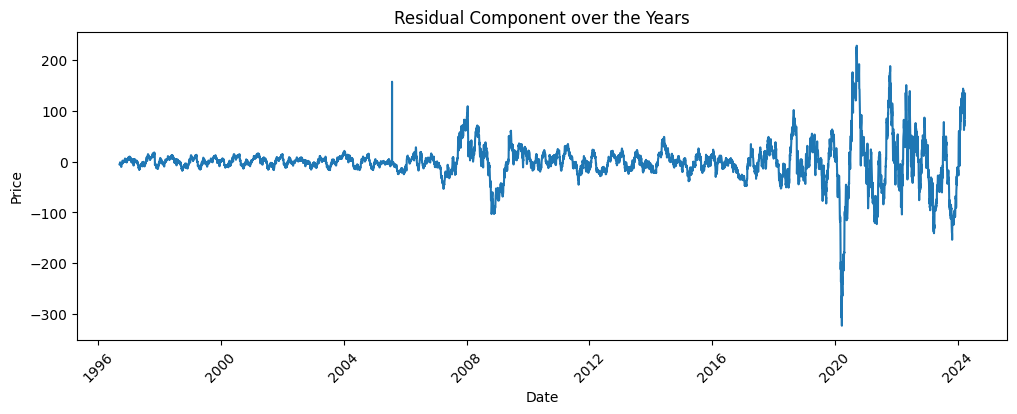

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(decomposition.resid)
plt.title('Residual Component over the Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
season = decomposition.seasonal

In [ ]:
season.index = data.index


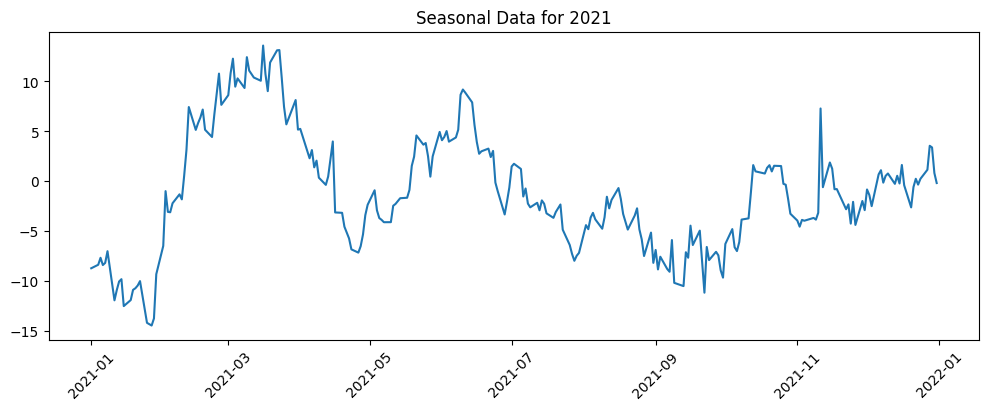

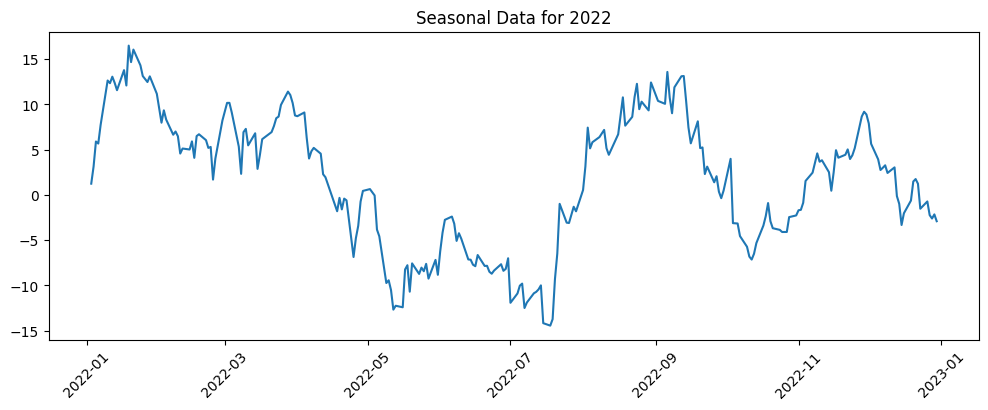

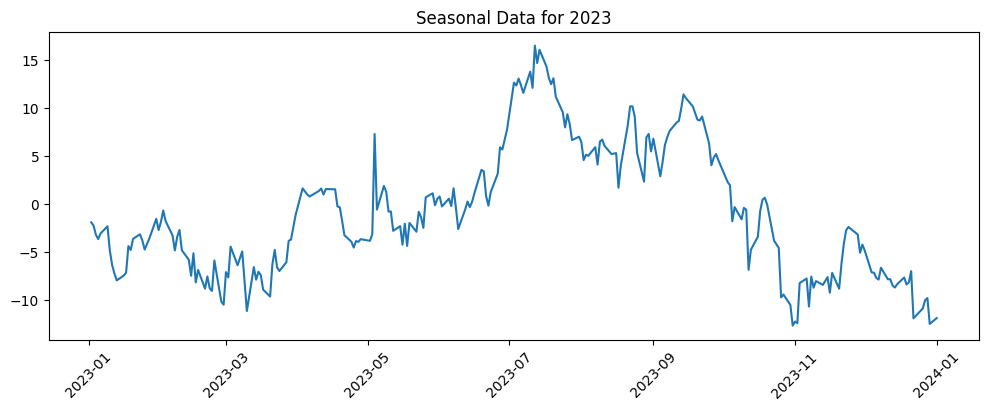

In [ ]:
years = ['2021','2022','2023']

# Loop through each year and plot the data
for year in years:
    plt.figure(figsize=(12, 4))
    plt.plot(season[f'{year}-01-01':f'{int(year) + 1}-01-01'])
    plt.title(f'Seasonal Data for {year}')
    plt.xticks(rotation=45)
    plt.show()


## Adfuller test

if the Value of p < 0.05  ----> Data is Stationary

if the value of p > 0.05  ----> Data is not Stationary

In [ ]:
result = adfuller(data["Close"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: 0.49138531444037675
p-value: 0.9846088945139826


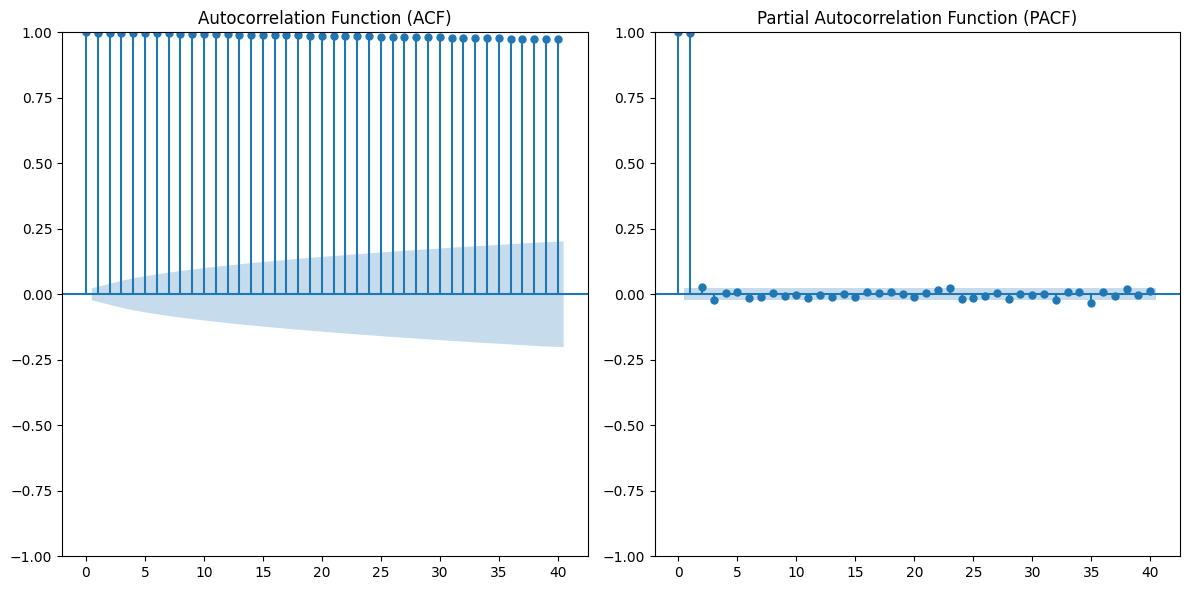

In [ ]:
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(data["Close"], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(data["Close"], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

### The Co-efficients become abruptly non-significant after 1st lag which is an indication of the AR process

## Splitting the data into 80:20 for train and test

In [ ]:
train = data['Close'][:int(0.8*(len(data)))].dropna()
test = data['Close'][int(0.8*(len(data))):].dropna()

## Building the AR Model


In [ ]:
model = AutoReg(train, lags=1)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
AR_predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [ ]:
AR_predictions.index = test.index

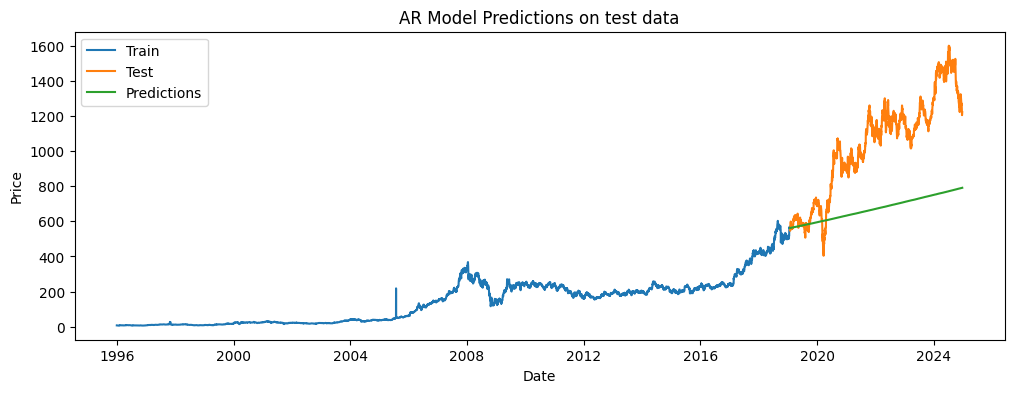

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(AR_predictions, label='Predictions')
plt.title('AR Model Predictions on test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
new_train = data['Close']

In [ ]:
model = AutoReg(new_train, lags=1)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
AR_future_prediction = model_fit.predict(start=len(new_train), end=len(new_train) + 30, dynamic=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [ ]:
AR_future_prediction.index = pd.date_range(start=new_train.index[-1], periods=31, freq='D')

## Predictions for the next 30 days by AR Model

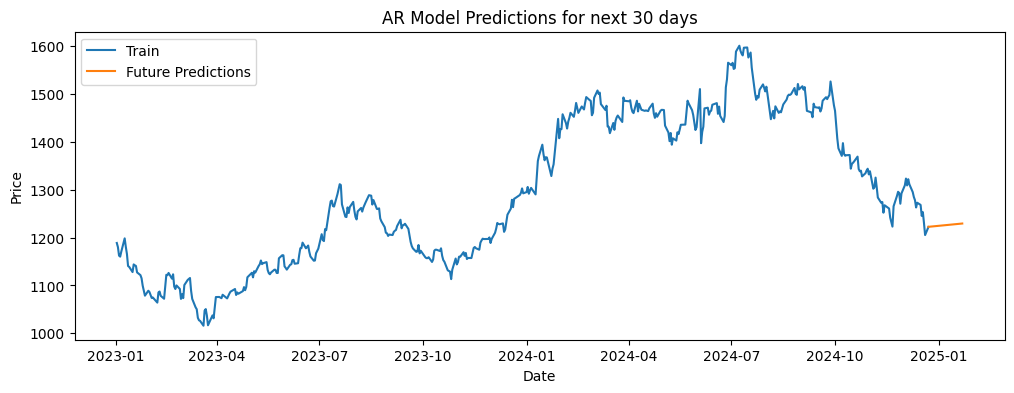

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(new_train['2023-01-01':], label='Train')
plt.plot(AR_future_prediction, label='Future Predictions')
plt.title('AR Model Predictions for next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
AR_error = mean_squared_error(test,AR_predictions)
AR_error = np.sqrt(AR_error)
print(f"Root Mean Squared Error (MSE): {AR_error}")

Root Mean Squared Error (MSE): 423.658219683252


## Building the MA Model

In [ ]:
model = ARIMA(train, order=(0, 2, 1))  # (p, d, q) where p=2, d=2, q=1
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
MA_predictions = model_fit.predict(start = len(train), end = len(train)+len(test)-1, dynamic=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
MA_predictions.index = test.index

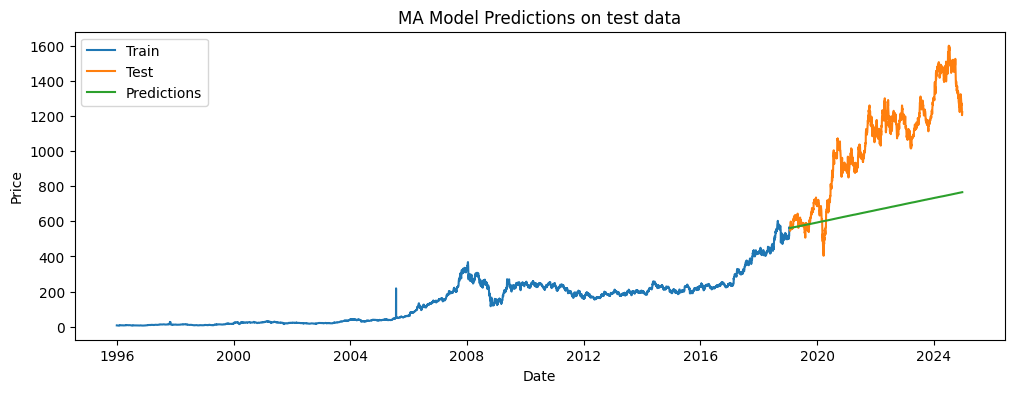

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(MA_predictions, label='Predictions')
plt.title('MA Model Predictions on test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
MA_error = mean_squared_error(test,MA_predictions)
MA_error = np.sqrt(MA_error)
print(f"Root Mean Squared Error (MSE): {MA_error}")

Root Mean Squared Error (MSE): 434.7785380399942


In [ ]:
model = ARIMA(new_train, order=(0, 2, 1))  # (p, d, q) where p=2, d=2, q=1
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
MA_future_prediction = model_fit.predict(start=len(new_train), end=len(new_train) + 30, dynamic=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
MA_future_prediction.index = pd.date_range(start=new_train.index[-1], periods=31, freq='D')

## Predictions for the next 30 days by MA Model

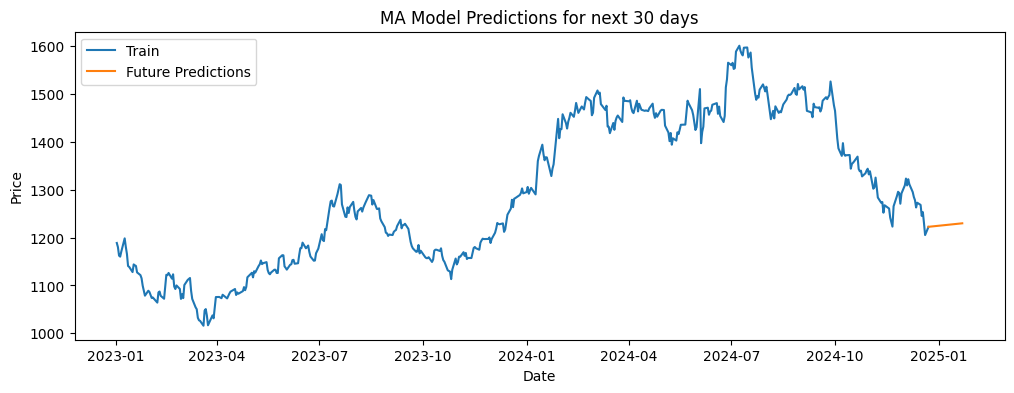

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(new_train['2023-01-01':], label='Train')
plt.plot(MA_future_prediction, label='Future Predictions')
plt.title('MA Model Predictions for next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Building the ARIMA Model

In [ ]:
model = ARIMA(train, order=(2, 2, 1))  # (p, d, q) where p=2, d=2, q=1
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
ARIMA_predictions = model_fit.predict(start = len(train), end = len(train)+len(test)-1, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
ARIMA_predictions.index = test.index

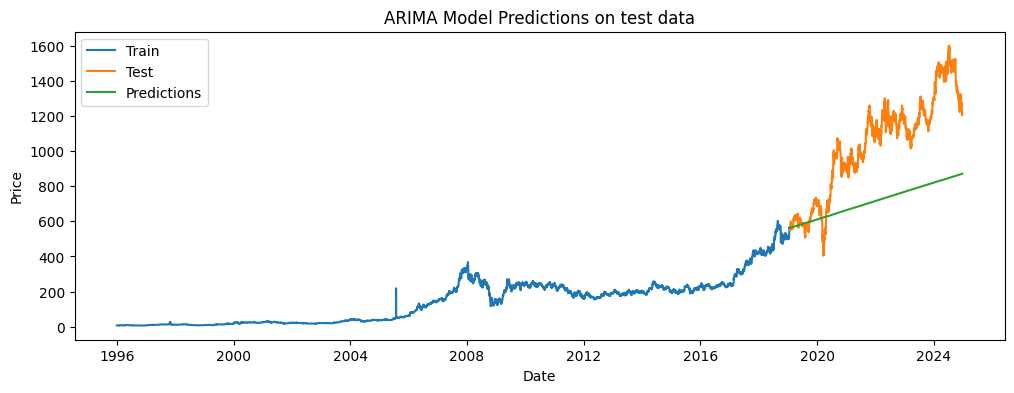

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(ARIMA_predictions, label='Predictions')
plt.title('ARIMA Model Predictions on test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
ARIMA_error = mean_squared_error(test,ARIMA_predictions)
ARIMA_error = np.sqrt(ARIMA_error)
print(f"Root Mean Squared Error (MSE): {ARIMA_error}")

Root Mean Squared Error (MSE): 375.76767853680514


In [ ]:
model = ARIMA(new_train, order=(2, 2, 1))  # (p, d, q) where p=2, d=2, q=1
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
ARIMA_future_prediction = model_fit.predict(start=len(new_train), end=len(new_train) + 30, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
ARIMA_future_prediction.index = pd.date_range(start=new_train.index[-1], periods=31, freq='D')

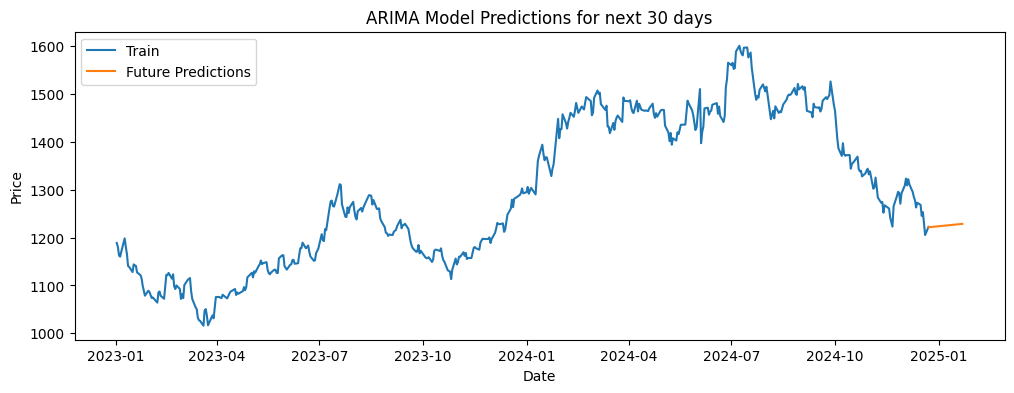

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(new_train['2023-01-01':], label='Train')
plt.plot(ARIMA_future_prediction, label='Future Predictions')
plt.title('ARIMA Model Predictions for next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

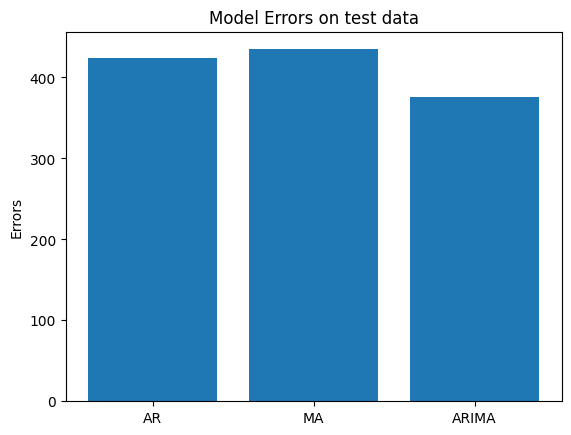

In [ ]:
errs = [AR_error,MA_error,ARIMA_error]
plt.bar(x = ['AR','MA','ARIMA'],height = errs)
plt.title('Model Errors on test data')
plt.ylabel('Errors')
plt.show()